In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
appeals_df = pd.read_csv('../data/zoning_board_appeals_tracker.csv')
print(appeals_df.shape)
print(appeals_df.columns.to_list())
appeals_df.head()

(9043, 19)
['address', 'status', 'parent_apno', 'boa_apno', 'appeal_type', 'contact', 'submitted_date', 'received_date', 'hearing_date', 'ever_deferred', 'num_deferrals', 'final_decision_date', 'decision', 'closed_date', 'city', 'zip', 'ward', 'zoning_district', 'project_description']


,address,status,parent_apno,boa_apno,appeal_type,contact,submitted_date,received_date,hearing_date,ever_deferred,num_deferrals,final_decision_date,decision,closed_date,city,zip,ward,zoning_district,project_description
0,14 Victoria ST Dorchester 02125,Community Process,U491529793,BOA1534425,Zoning,Matt Jeske,2023-10-10,2023-10-10,NaN,NaN,NaN,NaN,NaN,NaN,Dorchester,2125,13,Dorchester Neighborhood,We would to add 2 vehicle driveway on left sid...
1,122 Seaver ST Dorchester 02121,Community Process,U491485629,BOA1534528,Zoning,Erika Guerrero,2023-10-10,2023-10-10,NaN,NaN,NaN,NaN,NaN,NaN,Dorchester,2121,12,Roxbury Neighborhood,Use or premises Food trailer in parking space ...
2,9 Mckay Pl East Boston 02128,Community Process,ERT1523974,BOA1534462,Zoning,derric small,2023-10-10,2023-10-10,NaN,NaN,NaN,NaN,NaN,NaN,East Boston,2128,1,East Boston Neighborhood,Demolish existing structures combine lots erec...
3,3927 Washington ST Roslindale 02131,Community Process,ALT1522878,BOA1534015,Zoning,Anthony Ross,2023-10-07,2023-10-10,NaN,NaN,NaN,NaN,NaN,NaN,Roslindale,2131,19,Jamaica Plain Neighborhood,Add 4th floor to existing 3 story unit buildin...
4,27 Hopkins Rd Jamaica Plain 02130,Community Process,ERT1432001,BOA1534017,Zoning,Anthony Ross,2023-10-07,2023-10-10,NaN,NaN,NaN,NaN,NaN,NaN,Jamaica Plain,2130,19,Jamaica Plain Neighborhood,Erect single family home with attached two car...


['AppProv', 'Approved', 'DeniedPrej', 'Denied', 'Withdrawn']


<BarContainer object of 5 artists>

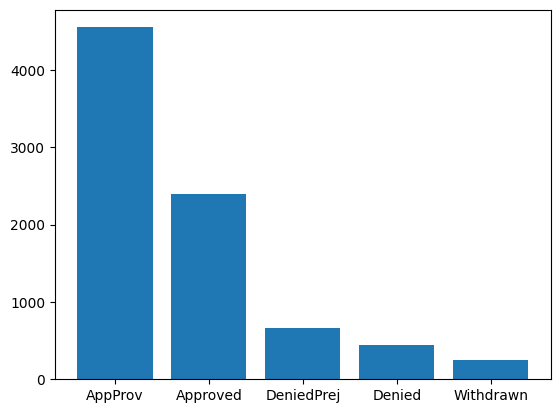

In [3]:
labels = [label for label in list(set(appeals_df['decision'])) if type(label) == str and label.strip() != '']
print(labels)
y_vals = [
    appeals_df[appeals_df['decision'] == label]['decision'].count() for label in labels
]

# Note: see that most appeals are approved, < 1000 are denied or denied with prejudice
plt.bar(labels, y_vals)

In [4]:
denied_df = appeals_df.query('decision == "Denied" | decision == "DeniedPrej"')

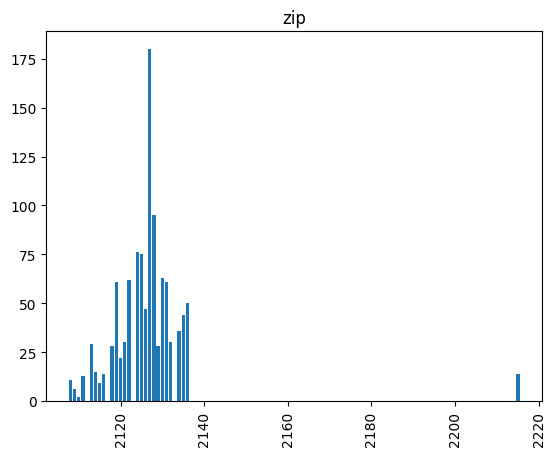

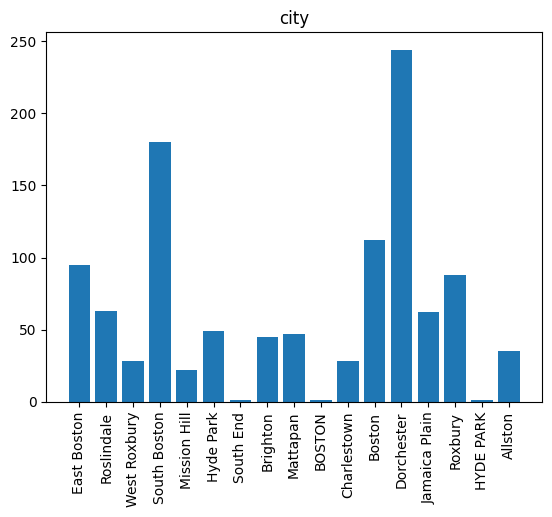

In [5]:
# Count zipcode, city, etc for denied permits

def count_labels(df, column_name):
    labels = [label for label in list(set(df[column_name]))]
    y_vals = [
        df[df[column_name] == label][column_name].count() for label in labels
    ]

    # Note: see that most appeals are approved, < 1000 are denied or denied with prejudice
    plt.title(column_name)
    plt.bar(labels, y_vals)
    plt.xticks(rotation = 90)
    plt.show()

count_labels(denied_df, "zip")
count_labels(denied_df, "city")

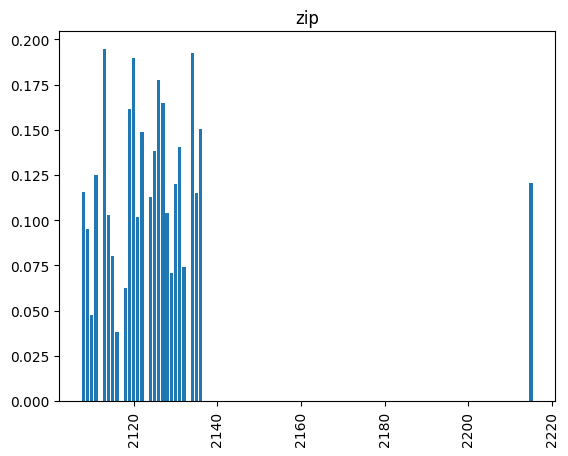

In [9]:
# Normalize by number of appeals in zip code

def count_labels_norm(df, column_name):
    labels = [label for label in list(set(df[column_name]))]
    y_vals = [
        ((df[df[column_name] == label][column_name].count()) / (appeals_df[appeals_df[column_name] == label].shape[0])) for label in labels
    ]

    # Note: see that most appeals are approved, < 1000 are denied or denied with prejudice
    plt.title(column_name)
    plt.bar(labels, y_vals)
    plt.xticks(rotation = 90)
    plt.show()

count_labels_norm(denied_df, "zip")